<a href="https://colab.research.google.com/github/shadenWq/sentiment-analysis-/blob/main/Copy_of_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

https://www.kaggle.com/datasets/infamouscoder/mental-health-social-media

In [ ]:
# Read the dataset
df = pd.read_csv('/content/Mental-Health-Twitter.csv')

# Exploratory Data Analysis (EDA)

In [ ]:
df.columns

Index(['Unnamed: 0', 'post_id', 'post_created', 'post_text', 'user_id',
       'followers', 'friends', 'favourites', 'statuses', 'retweets', 'label'],
      dtype='object')

In [ ]:
# Get the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    20000 non-null  int64 
 1   post_id       20000 non-null  int64 
 2   post_created  20000 non-null  object
 3   post_text     20000 non-null  object
 4   user_id       20000 non-null  int64 
 5   followers     20000 non-null  int64 
 6   friends       20000 non-null  int64 
 7   favourites    20000 non-null  int64 
 8   statuses      20000 non-null  int64 
 9   retweets      20000 non-null  int64 
 10  label         20000 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 1.7+ MB


In [ ]:
# Shape of the dataset (Rows, Columns)
df.shape

(20000, 11)

In [ ]:
# Get the first 5 rows of the dataset
df.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [ ]:
# Statistical data
df.describe()

,Unnamed: 0,post_id,user_id,followers,friends,favourites,statuses,retweets,label
count,20000.000000,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000
mean,9999.500000,6.874728e+17,3.548623e+16,900.483950,782.428750,6398.235550,4.439442e+04,1437.927300,0.500000
std,5773.647028,1.708396e+17,1.606083e+17,1899.913961,1834.817945,8393.072914,1.407785e+05,15119.665118,0.500013
min,0.000000,3.555966e+09,1.472438e+07,0.000000,0.000000,0.000000,3.000000e+00,0.000000,0.000000
25%,4999.750000,5.931686e+17,3.242944e+08,177.000000,211.000000,243.000000,5.129000e+03,0.000000,0.000000
50%,9999.500000,7.637400e+17,1.052122e+09,476.000000,561.000000,2752.000000,1.325100e+04,0.000000,0.500000
75%,14999.250000,8.153124e+17,2.285923e+09,1197.000000,701.000000,8229.000000,5.289200e+04,1.000000,1.000000
max,19999.000000,8.194574e+17,7.631825e+17,28614.000000,28514.000000,39008.000000,1.063601e+06,839540.000000,1.000000


In [ ]:
# Check if there is any missing values
df.isnull().sum()

Unnamed: 0      0
post_id         0
post_created    0
post_text       0
user_id         0
followers       0
friends         0
favourites      0
statuses        0
retweets        0
label           0
dtype: int64

In [ ]:
# Select only the needed columns
df = df[['Unnamed: 0', 'post_text', 'label']]

In [ ]:
df["label"] = df["label"].map({ 0 : 'non-depressed', 1 : 'depressed'})

# Data Pre-proccessing






In [ ]:
import nltk
import re #regular expression to clean data
from nltk.corpus import stopwords #stop word
nltk.download('stopwords') #corpus for stop words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

*Lemmatization*

In [ ]:
import spacy

# Load the English model with spaCy's POS tagging from spaCy
modelspacy = spacy.load("en_core_web_sm")#load once

# Function to lemmatize text with spaCy
def lemmatize_text(text):
    # Process the text using spaCy, create Doc object
    docForLemmatization = modelspacy(text) #the content of the doc: tokens with pos tags and lemmas

    # Lemmatize tokens, use "lemma_" attribute to get the lemma of each token
    lemmatized_tokens = [token.lemma_ for token in docForLemmatization]
    # and join them back into a single string
    return " ".join(lemmatized_tokens)

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
print(df['post_text'][0])
lemmatize_text(df['post_text'][0])

It's just over 2 years since I was diagnosed with #anxiety and #depression. Today I'm taking a moment to reflect on how far I've come since.


'it be just over 2 year since I be diagnose with # anxiety and # depression . today I be take a moment to reflect on how far I have come since .'

*Text* *Cleaning*

In [ ]:
def text_cleaning(text):

    text = text.lower() # Convert to lowercase

    text = re.sub(r'@[\S]+', '', text) # Remove usernames "sub" replacing substrings

    text = re.sub(r'https?://\S+|www\.\S+', '', text) # Remove hyperlinks

    text = re.sub('[^a-z0-9]+', ' ', text) # Remove punctuation


    stop_words = set(stopwords.words('english')) # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])

    text = lemmatize_text(text)# Lemmatize text

    return text

# Use text cleaning function to create 'clean_text' column
df['clean_text'] = df['post_text'].apply(text_cleaning)

In [ ]:
df.head()

,Unnamed: 0,post_text,label,clean_text
0,0,It's just over 2 years since I was diagnosed w...,depressed,2 year since diagnose anxiety depression today...
1,1,"It's Sunday, I need a break, so I'm planning t...",depressed,sunday need break planning spend little time p...
2,2,Awake but tired. I need to sleep but my brain ...,depressed,awake tired need sleep brain idea
3,3,RT @SewHQ: #Retro bears make perfect gifts and...,depressed,rt retro bear make perfect gift great beginner...
4,4,It’s hard to say whether packing lists are mak...,depressed,hard say whether pack list make life easy rein...


# VADER Model

In [ ]:
from tqdm.notebook import tqdm # Bar to follow the model's progress

In [ ]:
nltk.download('vader_lexicon') # Pre-trained VADER model by NLTK
from nltk.sentiment import SentimentIntensityAnalyzer # Class to perform sentiment analysis on text data
sia=SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# An example to show sentiment scores of VADER
example = df['clean_text'][0]
print(example)
sia.polarity_scores(example)

2 year since diagnose anxiety depression today take moment reflect far come since


{'neg': 0.351, 'neu': 0.649, 'pos': 0.0, 'compound': -0.6597}

In [ ]:
res = {} # Empty dictionary to store results

# for loop to apply the model to each row in the DataFrame
for i, row in tqdm(df.iterrows(), total = len(df)):
  text = row['clean_text']
  myid = row['Unnamed: 0']
  res[myid] = sia.polarity_scores(text)

  0%|          | 0/20000 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T # Convert the res dictionary into a DataFrame
vaders = vaders.reset_index().rename(columns={'index' : 'Unnamed: 0'})
vaders = vaders.merge(df) # combine VADER results with df

In [ ]:
vaders.head()

,Unnamed: 0,neg,neu,pos,compound,post_text,label,clean_text
0,0,0.351,0.649,0.000,-0.6597,It's just over 2 years since I was diagnosed w...,depressed,2 year since diagnose anxiety depression today...
1,1,0.000,1.000,0.000,0.0000,"It's Sunday, I need a break, so I'm planning t...",depressed,sunday need break planning spend little time p...
2,2,0.367,0.633,0.000,-0.4404,Awake but tired. I need to sleep but my brain ...,depressed,awake tired need sleep brain idea
3,3,0.000,0.415,0.585,0.9337,RT @SewHQ: #Retro bears make perfect gifts and...,depressed,rt retro bear make perfect gift great beginner...
4,4,0.182,0.647,0.171,0.2023,It’s hard to say whether packing lists are mak...,depressed,hard say whether pack list make life easy rein...


In [ ]:
vaders['VaderAnalysis'] = vaders.apply(lambda x:
                                       'Negative' if x['compound'] < 0
                                       else ('Neutral' if x['compound'] == 0
                                             else 'Positive'), axis=1)

In [ ]:
vaders.head()

,Unnamed: 0,neg,neu,pos,compound,post_text,label,clean_text,VaderAnalysis
0,0,0.351,0.649,0.000,-0.6597,It's just over 2 years since I was diagnosed w...,depressed,2 year since diagnose anxiety depression today...,Negative
1,1,0.000,1.000,0.000,0.0000,"It's Sunday, I need a break, so I'm planning t...",depressed,sunday need break planning spend little time p...,Neutral
2,2,0.367,0.633,0.000,-0.4404,Awake but tired. I need to sleep but my brain ...,depressed,awake tired need sleep brain idea,Negative
3,3,0.000,0.415,0.585,0.9337,RT @SewHQ: #Retro bears make perfect gifts and...,depressed,rt retro bear make perfect gift great beginner...,Positive
4,4,0.182,0.647,0.171,0.2023,It’s hard to say whether packing lists are mak...,depressed,hard say whether pack list make life easy rein...,Positive


In [ ]:
final_df = df[['clean_text', 'sentiment label']][0-10000]

## VADER Results

In [ ]:
#percentage of positive tweets
PositiveTweets= vaders[vaders.VaderAnalysis=='Positive']
PositiveTweets= round((PositiveTweets.shape[0]/vaders.shape[0])*100,1)
PositiveTweets

39.0

In [ ]:
#percentage of Negative tweets
NegativeTweets= vaders[vaders.VaderAnalysis=='Negative']
NegativeTweets= round((NegativeTweets.shape[0]/vaders.shape[0])*100,1)
NegativeTweets

27.3

In [ ]:
#percentage of Neutral tweets
NeutralTweets= vaders[vaders.VaderAnalysis=='Neutral']
NeutralTweets= round((NeutralTweets.shape[0]/vaders.shape[0])*100,1)
NeutralTweets

33.8

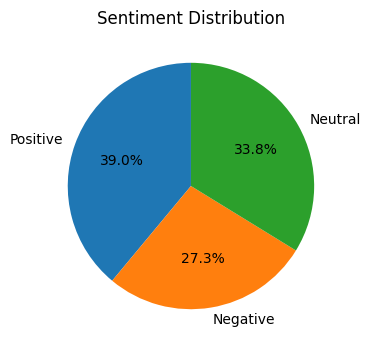

In [ ]:
# Sample data
labels = ['Positive', 'Negative', 'Neutral']
sizes = [PositiveTweets, NegativeTweets, NeutralTweets]  # These values should represent the percentages of each sentiment category

# Creating pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.show()

<Axes: xlabel='label', ylabel='count'>

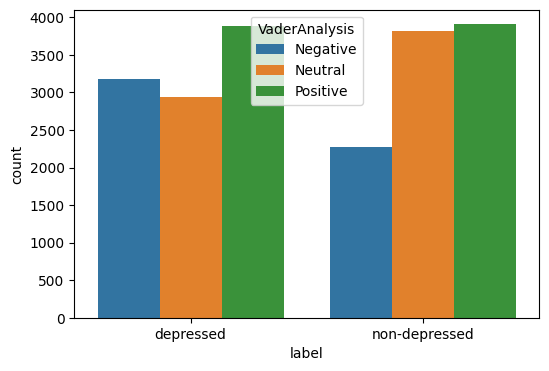

In [ ]:
# Sentiment distribution of each label
plt.figure(figsize=(6, 4))
sns.countplot(vaders, x="label", hue="VaderAnalysis")

# RoBERTa

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
#Pretrained model by huggingface
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment" #PretrainedModel
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
def polarity_scores_roberta(example):
    encoded_text= tokenizer(example,return_tensors="pt") #Convert text into 0,1 so model can understand
    output = model(**encoded_text) #Going to run encoded values
    scores = output[0][0].detach().numpy() #Converting tensor to numpy
    scores = softmax(scores) #Normalizes the results
    #Create a new dictionary to store the results
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
example = df['clean_text'][0]
print(example)
encoded_text= tokenizer(example,return_tensors="pt") #Convert text into 0,1 so model can understand
print("The encoded text is :", encoded_text)
output = model(**encoded_text) #Going to run encoded value
print("Output:", output)
scores = output[0][0].detach().numpy() #Converting tensor to numpy
print("Scores:",scores)
scores = softmax(scores) #Normalizes the results
print("Scores:",scores)
polarity_scores_roberta(example)

2 year since diagnose anxiety depression today take moment reflect far come since
The encoded text is : {'input_ids': tensor([[    0,   176,    76,   187, 29263,  6882,  6943,   452,   185,  1151,
          4227,   444,   283,   187,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}
Output: SequenceClassifierOutput(loss=None, logits=tensor([[-1.1699,  0.8121,  0.1868]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
Scores: [-1.1698556   0.81207675  0.18682984]
Scores: [0.08237197 0.5977529  0.3198751 ]


{'roberta_neg': 0.08237197, 'roberta_neu': 0.5977529, 'roberta_pos': 0.3198751}

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  text = row['clean_text']
  myid = row['Unnamed: 0']
  res[myid] = polarity_scores_roberta(text)

  0%|          | 0/20000 [00:00<?, ?it/s]

In [ ]:
robertas = pd.DataFrame(res).T
robertas = robertas.reset_index().rename(columns={'index': 'Unnamed: 0'})
robertas = robertas.merge(df, how='left')

In [ ]:
# Calculate the polarity for each text by:
# first multiplying each probability to its weights (-1=> negative, 0=>neutral and +1=>positive)
# then sum the values and pass through Tanh function to scale values from -1 up to +1
# finally we can assign labels for each text, depending on the polarity, e.g. -1.0 until -0.25 negavite
import torch
import torch.nn as nn
polarity_weights = torch.tensor([-1, 0, 1])
probs = torch.tensor(robertas[["roberta_neg", "roberta_neu", "roberta_pos"]].values)
polarity = polarity_weights * probs
polarity = polarity.sum(dim=-1)
polarity_scaled = nn.Tanh()(polarity) #scale values from -1 up to +1
robertas['RobertaPolarity'] = polarity_scaled.numpy()
robertas['RobertaAnalysis'] = pd.cut(
    robertas["RobertaPolarity"],
    bins=[-1.0, -0.25, 0.25, 1.0], # assign labels depending on the polarity
    labels=["Negative", "Neutral", "Positive"],
)

In [ ]:
robertas.head()

,Unnamed: 0,roberta_neg,roberta_neu,roberta_pos,post_text,label,clean_text,RobertaPolarity,RobertaAnalysis
0,0,0.082372,0.597753,0.319875,It's just over 2 years since I was diagnosed w...,depressed,2 year since diagnose anxiety depression today...,0.233136,Neutral
1,1,0.138149,0.775909,0.085942,"It's Sunday, I need a break, so I'm planning t...",depressed,sunday need break planning spend little time p...,-0.052159,Neutral
2,2,0.366634,0.599788,0.033577,Awake but tired. I need to sleep but my brain ...,depressed,awake tired need sleep brain idea,-0.321265,Negative
3,3,0.001725,0.031463,0.966812,RT @SewHQ: #Retro bears make perfect gifts and...,depressed,rt retro bear make perfect gift great beginner...,0.746537,Positive
4,4,0.397199,0.557347,0.045454,It’s hard to say whether packing lists are mak...,depressed,hard say whether pack list make life easy rein...,-0.337922,Negative


## RoBERTa Results

In [ ]:
#percentage of positive tweets
positiveTweets= robertas[robertas.RobertaAnalysis=='Positive']
positiveTweets= round((positiveTweets.shape[0]/robertas.shape[0])*100,1)
positiveTweets

22.6

In [ ]:
#percentage of Negative tweets
NegativeTweets= robertas[robertas.RobertaAnalysis=='Negative']
NegativeTweets= round((NegativeTweets.shape[0]/robertas.shape[0])*100,1)
NegativeTweets

28.7

In [ ]:
#percentage of Neutral tweets
NeutralTweets= robertas[robertas.RobertaAnalysis=='Neutral']
NeutralTweets= round((NeutralTweets.shape[0]/robertas.shape[0])*100,1)
NeutralTweets

48.7

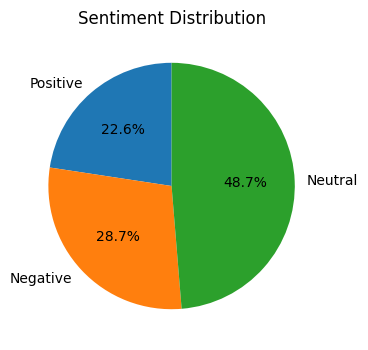

In [ ]:
# Sample data
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positiveTweets, NegativeTweets, NeutralTweets]  # These values should represent the percentages of each sentiment category

# Creating pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.show()

<Axes: xlabel='label', ylabel='count'>

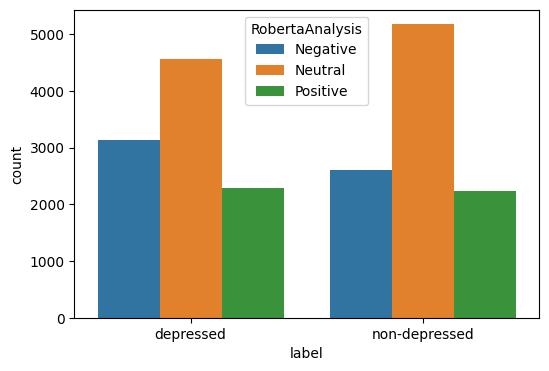

In [ ]:
# Sentiment distribution of each label
plt.figure(figsize=(6, 4))
sns.countplot(robertas, x="label", hue="RobertaAnalysis")

# Evaluation of RoBERTa

https://colab.research.google.com/drive/1QsArRDuRYEZK62b-y-ux8DgQZ-LMA6qo?usp=sharing

# Fine-tuning RoBERTa


https://colab.research.google.com/drive/16oIg-GCzEHacHsyLhAcN7uYm7tnCeW7g?usp=sharing


# TextCNN

https://colab.research.google.com/drive/1aedBrdHYtE_KYVQMRJWMuSjeZJ3zFA_i?usp=sharing
